In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('/Users/lukeopany/Documents/consumer complaints/consumercomplaints.csv')

In [5]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101969 entries, 0 to 3101968
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Unnamed: 0                    3101969 non-null  int64 
 1   Date received                 3101969 non-null  object
 2   Product                       3101969 non-null  object
 3   Sub-product                   2866675 non-null  object
 4   Issue                         3101969 non-null  object
 5   Sub-issue                     2418614 non-null  object
 6   Consumer complaint narrative  1113992 non-null  object
dtypes: int64(1), object(6)
memory usage: 165.7+ MB


In [6]:
data.describe()

,Unnamed: 0
count,3.101969e+06
mean,1.550984e+06
std,8.954615e+05
min,0.000000e+00
25%,7.754920e+05
50%,1.550984e+06
75%,2.326476e+06
max,3.101968e+06


In [11]:
duplicates = data[data.duplicated()]
print(f"Shape of duplicates: {duplicates.shape}")
if len(duplicates) > 0:
    display(duplicates.head())

Shape of duplicates: (0, 7)


In [12]:
#Dropped the Unnamed: 0 column as it is not needed
data = data.drop('Unnamed: 0', axis=1)

In [7]:
data.head(5)

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN
1,1,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
2,2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN
3,3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
4,4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN


In [13]:
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887808 entries, 3 to 3101964
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Unnamed: 0                    887808 non-null  int64 
 1   Date received                 887808 non-null  object
 2   Product                       887808 non-null  object
 3   Sub-product                   887808 non-null  object
 4   Issue                         887808 non-null  object
 5   Sub-issue                     887808 non-null  object
 6   Consumer complaint narrative  887808 non-null  object
dtypes: int64(1), object(6)
memory usage: 54.2+ MB


In [27]:
data['Product'].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    507582
Debt collection                                                                 192045
Credit card or prepaid card                                                      80410
Checking or savings account                                                      54192
Student loan                                                                     32697
Vehicle loan or lease                                                            19874
Payday loan, title loan, or personal loan                                         1008
Name: count, dtype: int64

In [ ]:
data.head(5)

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
3,3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
11,11,2022-11-09,Debt collection,Other debt,False statements or representation,Indicated you were committing crime by not pay...,XXXX is attempting to collect funds for Valuat...
15,15,2022-11-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Today I called to get my balance and reset my ...
51,51,2022-10-12,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,The Federal Trade Commission Bureau of Consume...
72,72,2022-10-09,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,Ive mailed police report called been hung up o...


In [8]:
#Checking for class imbalance for the Product column
#visualized, 
class_counts = data['Product'].value_counts()
print(class_counts)
print(f"Imbalance ratio: {class_counts.max() / class_counts.min():.2f}:1")



Product
Credit reporting, credit repair services, or other personal consumer reports    1432096
Debt collection                                                                  452620
Mortgage                                                                         365181
Credit card or prepaid card                                                      165452
Checking or savings account                                                      141849
Credit reporting                                                                 140430
Credit card                                                                       89190
Bank account or service                                                           86206
Student loan                                                                      71530
Money transfer, virtual currency, or money service                                47641
Vehicle loan or lease                                                             37161
Consumer Loan           

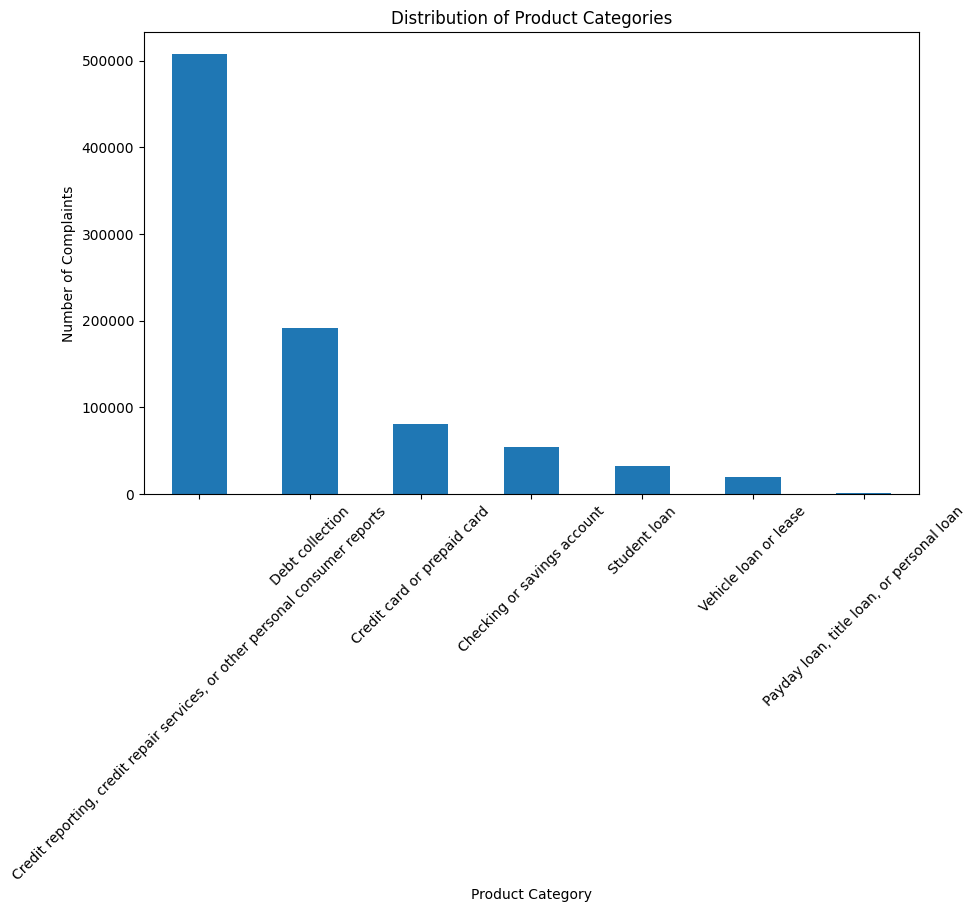

In [36]:
data ['Product'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

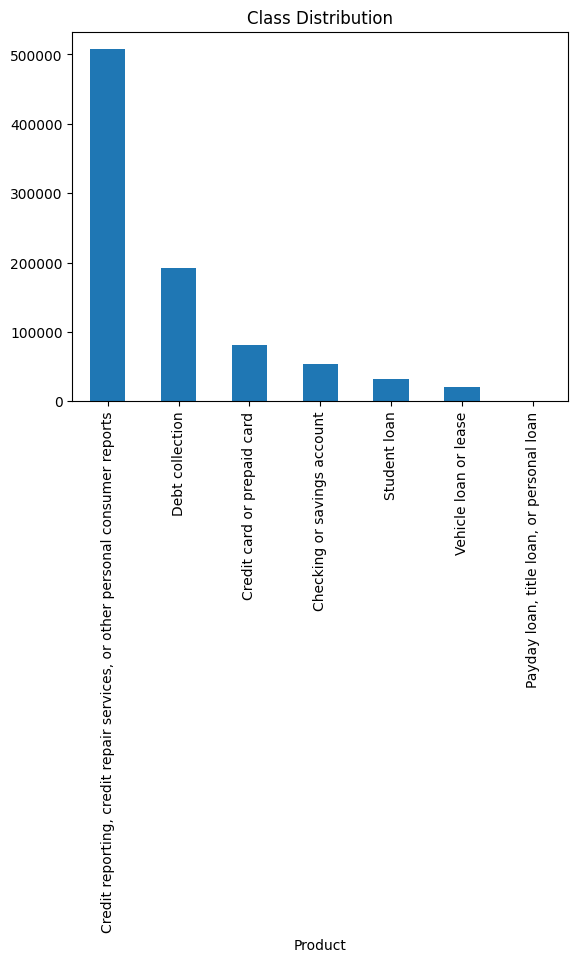

In [39]:
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [41]:
percentages = data['Product'].value_counts(normalize=True) * 100
print(percentages)

Product
Credit reporting, credit repair services, or other personal consumer reports    57.172497
Debt collection                                                                 21.631366
Credit card or prepaid card                                                      9.057138
Checking or savings account                                                      6.104022
Student loan                                                                     3.682891
Vehicle loan or lease                                                            2.238547
Payday loan, title loan, or personal loan                                        0.113538
Name: proportion, dtype: float64


In [42]:
data.head()

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
3,3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
11,11,2022-11-09,Debt collection,Other debt,False statements or representation,Indicated you were committing crime by not pay...,XXXX is attempting to collect funds for Valuat...
15,15,2022-11-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Today I called to get my balance and reset my ...
51,51,2022-10-12,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,The Federal Trade Commission Bureau of Consume...
72,72,2022-10-09,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,Ive mailed police report called been hung up o...


In [44]:
from text_cleaner import clean, clean_dataframe_column

In [ ]:
!pip install nltk pandas

In [ ]:
#Data Preprocessing and Cleaning: using the function/texxt_cleaner.py file

In [15]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].apply(clean)

<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
/var/folders/7l/9tv4v_3n66j8zq9dm5rg54rh0000gn/T/ipykernel_66143/3389717115.py:11: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/7l/9tv4v_3n66j8zq9dm5rg54rh0000gn/T/ipykernel_66143/3389717115.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/var/folders/7l/9tv4v_3n66j8zq9dm5rg54rh0000gn/T/ipykernel_66143/3389717115.py:16: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukeopany/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
data[['Consumer complaint narrative', 'Product']].head(10)

,Consumer complaint narrative,Product
3,hi bank well fargo decad within past year gra...,Checking or savings account
11,xxxx attempt collect fund valuat servic provid...,Debt collection
15,today call get balanc reset password credit ca...,"Credit reporting, credit repair services, or o..."
51,feder trade commiss bureau consum protect rece...,"Credit reporting, credit repair services, or o..."
72,ive mail polic report call hung stall rep lie ...,"Credit reporting, credit repair services, or o..."
127,xxxx xxxx debt collect agenc constant harass...,"Credit reporting, credit repair services, or o..."
128,compani xxxx xxxxxxxx xxxx report inaccur inco...,"Credit reporting, credit repair services, or o..."
240,remov address asap inaccur input credit live s...,"Credit reporting, credit repair services, or o..."
311,auto loan error wife pass away tuesday disput...,Debt collection
330,file multipl disput compani name xxxx xxxx cre...,"Credit reporting, credit repair services, or o..."


In [18]:
x = np.array(data['Consumer complaint narrative'])

In [19]:
y = np.array(data['Product'])

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer()
X = cv.fit_transform(x)  # Fit the model and transform the data into feature vectors

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)